In [105]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

In [106]:
df = pd.read_csv("/Users/timataskin/Desktop/AI_ML/Lab1/SkillCraft.csv")

In [107]:
print(f"First 5 line with head:\n{df.head()}")

First 5 line with head:
   GameID  LeagueIndex  Age  HoursPerWeek  TotalHours       APM  \
0      52            5   27            10        3000  143.7180   
1      55            5   23            10        5000  129.2322   
2      56            4   30            10         200   69.9612   
3      57            3   19            20         400  107.6016   
4      58            3   32            10         500  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0         0.003515         0.000220              7        0.000110   
1         0.003304         0.000259              4        0.000294   
2         0.001101         0.000336              4        0.000294   
3         0.001034         0.000213              1        0.000053   
4         0.001136         0.000327              2        0.000000   

   MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0            0.000392      0.004849         32.6677        40.8673   
1           

In [108]:
print(f"Size table:\n{df.shape}\n")

Size table:
(3338, 20)



In [109]:
print(f"Sum of NaN:\n{df.isnull().sum()}\n")

Sum of NaN:
GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64



In [110]:
print(f"Data types:\n{df.dtypes}\n")

Data types:
GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object



In [111]:
print(f"\nCorrelation:\n{df.corr()}")


Correlation:
                        GameID  LeagueIndex       Age  HoursPerWeek  \
GameID                1.000000     0.024974  0.088511     -0.025322   
LeagueIndex           0.024974     1.000000 -0.127518      0.217930   
Age                   0.088511    -0.127518  1.000000     -0.184431   
HoursPerWeek         -0.025322     0.217930 -0.184431      1.000000   
TotalHours            0.004178     0.023884 -0.016630      0.024306   
APM                   0.075944     0.624171 -0.210724      0.246897   
SelectByHotkeys       0.070298     0.428637 -0.131105      0.205792   
AssignToHotkeys       0.063915     0.487280 -0.104960      0.158316   
UniqueHotkeys         0.081176     0.322415  0.015119      0.070262   
MinimapAttacks        0.022422     0.270526  0.043100      0.084103   
MinimapRightClicks    0.009898     0.206380 -0.019904      0.049498   
NumberOfPACs          0.035622     0.589193 -0.197128      0.174871   
GapBetweenPACs       -0.065629    -0.537536  0.112106     -0.13

In [112]:
df = df.dropna()
print("\nAfter dropna size:", df.shape)


After dropna size: (3338, 20)


In [113]:
# Приводим строки, похожие на числа, к numeric
for col in df.columns:
    if df[col].dtype == 'object':
        s = df[col].dropna().astype(str).str.strip()
        if len(s) == 0:
            continue
        # если >70% строк выглядят как число, приводим к числовому
        num_like = s.str.match(r'^-?\d+(\.\d+)?$').sum()
        if num_like / len(s) > 0.7:
            df[col] = pd.to_numeric(df[col].str.replace(',', '.').str.replace(' ', ''), errors='coerce')

# ещё раз удалим возможные NaN, образовавшиеся при приведении 
df = df.dropna()
print("After type conversion size:", df.shape)
print("Dtypes now:\n", df.dtypes)

After type conversion size: (3338, 20)
Dtypes now:
 GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


In [114]:
out_dir = "/Users/timataskin/Desktop/AI_ML/Lab1/"
os.makedirs(out_dir, exist_ok=True)
processed_path = os.path.join(out_dir, "SkillCraft_processed.csv")
df.to_csv(processed_path, index=False)
print("Saved processed CSV:", processed_path)


Saved processed CSV: /Users/timataskin/Desktop/AI_ML/Lab1/SkillCraft_processed.csv



Correlation matrix (numeric):
                       GameID  LeagueIndex    Age  HoursPerWeek  TotalHours  \
GameID                 1.000        0.025  0.089        -0.025       0.004   
LeagueIndex            0.025        1.000 -0.128         0.218       0.024   
Age                    0.089       -0.128  1.000        -0.184      -0.017   
HoursPerWeek          -0.025        0.218 -0.184         1.000       0.024   
TotalHours             0.004        0.024 -0.017         0.024       1.000   
APM                    0.076        0.624 -0.211         0.247       0.073   
SelectByHotkeys        0.070        0.429 -0.131         0.206       0.082   
AssignToHotkeys        0.064        0.487 -0.105         0.158       0.042   
UniqueHotkeys          0.081        0.322  0.015         0.070       0.009   
MinimapAttacks         0.022        0.271  0.043         0.084       0.001   
MinimapRightClicks     0.010        0.206 -0.020         0.049       0.008   
NumberOfPACs           0.036    

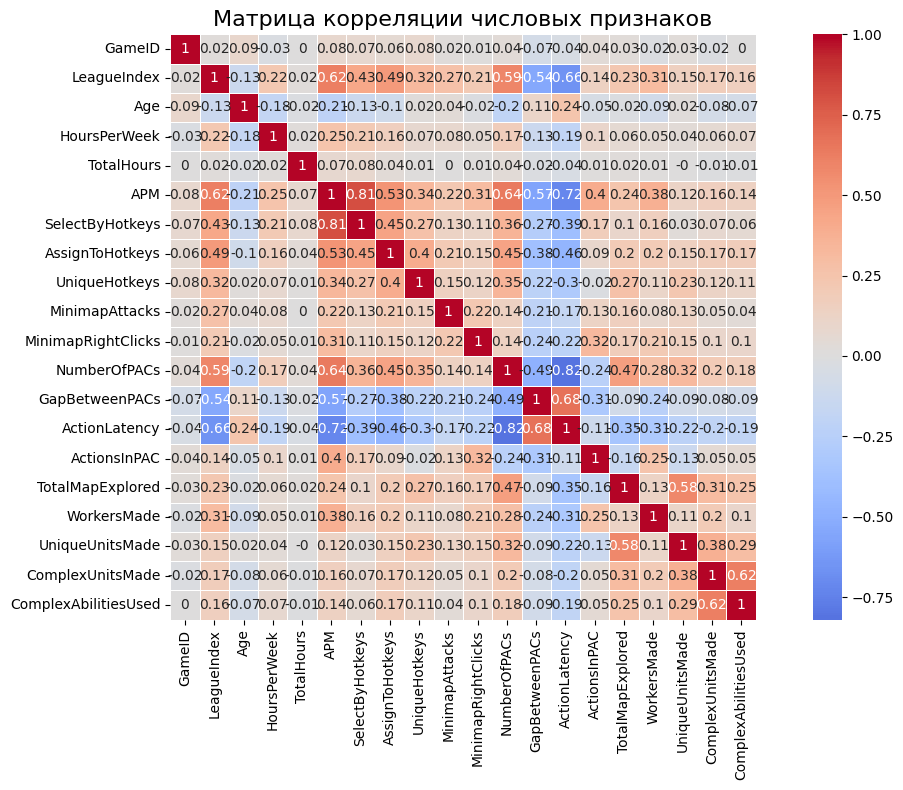

Сохранен график: correlation_matrix_heatmap.png


In [115]:
# Корреляция числовых признаков
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
print("\nCorrelation matrix (numeric):\n", corr.round(3))
corr.to_csv(os.path.join(out_dir, "correlation_matrix.csv"))

plt.figure(figsize=(12, 8))
# Создаем тепловую карту
heatmap = sns.heatmap(corr.round(2), 
                      annot=True,        # Показать числа в ячейках
                      cmap='coolwarm',   # Цветовая схема
                      center=0,          # Центр цветовой шкалы на 0
                      square=True,
                      linewidths=0.5)

plt.title('Матрица корреляции числовых признаков', fontsize=16)
# Сохраняем и показываем
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "correlation_matrix_heatmap.png"), dpi=120)
plt.show()
print("Сохранен график: correlation_matrix_heatmap.png")

In [116]:
# Удаление выбросов — простая фильтрация 1%-99% по используемым колонкам
used_cols = set(x1.columns.tolist() + x_set1_cols + x_set2_cols + ["APM"])
used_cols = [c for c in used_cols if c in df.columns]
df_no_out = df.copy()
for c in used_cols:
    if np.issubdtype(df_no_out[c].dtype, np.number):
        q_low = df_no_out[c].quantile(0.01)
        q_high = df_no_out[c].quantile(0.99)
        df_no_out = df_no_out[(df_no_out[c] >= q_low) & (df_no_out[c] <= q_high)]

print("Size before/after outlier removal:", df.shape, "->", df_no_out.shape)
df_no_out.to_csv(os.path.join(out_dir, "SkillCraft_no_outliers.csv"), index=False)  

Size before/after outlier removal: (3338, 20) -> (2999, 20)


In [117]:
# Выбор target и признаков
if "APM" not in df.columns:
    raise SystemExit("Нет колонки APM в таблице. Проверь файл.")

y = df["APM"]

# x1 — одна переменная
x1 = df[["HoursPerWeek"]] if "HoursPerWeek" in df.columns else df[[df.columns[0]]]

# Набор 1
x_set1_cols = [c for c in ("HoursPerWeek", "TotalHours", "ActionLatency") if c in df.columns]
x_set1 = df[x_set1_cols]

# Набор 2
x_set2_cols = [c for c in ("WorkersMade", "UniqueUnitsMade", "ComplexUnitsMade") if c in df.columns]
x_set2 = df[x_set2_cols]

# Набор 4 (5 признаков для 4-й модели)
# Возможные кандидаты (подставьте свои названия столбцов)
possible_features_for_m4 = [
    "HoursPerWeek", "TotalHours", "ActionLatency", 
    "SelectByHotkeys", "AssignToHotkeys", "NumberOfPACs",
    "GapBetweenPACs", "WorkersMade", "ComplexUnitsMade",
    "UniqueUnitsMade", "MinimapAttacks", "MinimapRightClicks"
]

# Собираем 5 признаков
x_set4_cols = []
for feat in possible_features_for_m4:
    if feat in df.columns and feat != "APM":  # Исключаем целевую переменную
        x_set4_cols.append(feat)
    if len(x_set4_cols) == 5:  # Останавливаемся, когда набрали 5
        break

# Если набрали меньше 5, добавим любые другие числовые признаки
if len(x_set4_cols) < 5:
    additional = [c for c in df.columns 
                  if c not in x_set4_cols and c != "APM" 
                  and np.issubdtype(df[c].dtype, np.number)]
    x_set4_cols.extend(additional[:5 - len(x_set4_cols)])

x_set4 = df[x_set4_cols] if x_set4_cols else pd.DataFrame()

print("\nSelected features:")
print("x1:", x1.columns.tolist())
print("x_set1:", x_set1_cols)
print("x_set2:", x_set2_cols)
print("x_set4 (5 features):", x_set4_cols)


Selected features:
x1: ['HoursPerWeek']
x_set1: ['HoursPerWeek', 'TotalHours', 'ActionLatency']
x_set2: ['WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade']
x_set4 (5 features): ['HoursPerWeek', 'TotalHours', 'ActionLatency', 'SelectByHotkeys', 'AssignToHotkeys']


In [118]:
# Формируем train/test
def prepare_xy(df_use, feature_cols, target_col="APM"):
    X = df_use[feature_cols].astype(float)
    y_local = df_use[target_col].astype(float)
    mask = X.notnull().all(axis=1) & y_local.notnull()
    return X[mask], y_local[mask]

X1, Y1 = prepare_xy(df_no_out, x1.columns.tolist())
X2, Y2 = prepare_xy(df_no_out, x_set1_cols) if x_set1_cols else (pd.DataFrame(), pd.Series())
X3, Y3 = prepare_xy(df_no_out, x_set2_cols) if x_set2_cols else (pd.DataFrame(), pd.Series())
X4, Y4 = prepare_xy(df_no_out, x_set4_cols) if x_set4_cols else (pd.DataFrame(), pd.Series())

# split (test 20%)
X1_tr, X1_te, y1_tr, y1_te = train_test_split(X1, Y1, test_size=0.2, random_state=0)
if not X2.empty:
    X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, Y2, test_size=0.2, random_state=0)
else:
    X2_tr = X2_te = y2_tr = y2_te = None
if not X3.empty:
    X3_tr, X3_te, y3_tr, y3_te = train_test_split(X3, Y3, test_size=0.2, random_state=0)
else:
    X3_tr = X3_te = y3_tr = y3_te = None
if not X4.empty:
    X4_tr, X4_te, y4_tr, y4_te = train_test_split(X4, Y4, test_size=0.2, random_state=0)
else:
    X4_tr = X4_te = y4_tr = y4_te = None

print("\nTrain/test sizes:")
print("m1:", X1_tr.shape, X1_te.shape)
if X2_tr is not None:
    print("m2:", X2_tr.shape, X2_te.shape)
if X3_tr is not None:
    print("m3:", X3_tr.shape, X3_te.shape)
if X4_tr is not None:
    print("m4:", X4_tr.shape, X4_te.shape)

# Построение моделей
model1 = LinearRegression()
model1.fit(X1_tr, y1_tr)

model2 = None
if X2_tr is not None:
    model2 = LinearRegression()
    model2.fit(X2_tr, y2_tr)

model3 = None
if X3_tr is not None:
    model3 = LinearRegression()
    model3.fit(X3_tr, y3_tr)

model4 = None
if X4_tr is not None:
    model4 = LinearRegression()
    model4.fit(X4_tr, y4_tr)

# Анализ моделей: коэффициенты, R2, RMSE
def evaluate(model, X_te, y_te):
    pred = model.predict(X_te)
    r2 = r2_score(y_te, pred)
    rmse = np.sqrt(mean_squared_error(y_te, pred))
    return pred, r2, rmse

pred1, r2_1, rmse_1 = evaluate(model1, X1_te, y1_te)

print("\nm1 (one feature):")
print(" Coef:", model1.coef_, "Intercept:", model1.intercept_)
print(f" R2: {r2_1:.4f}  RMSE: {rmse_1:.4f}")

if model2 is not None:
    pred2, r2_2, rmse_2 = evaluate(model2, X2_te, y2_te)
    print("\nm2 (set1):")
    print(" Coefs:", model2.coef_, "Intercept:", model2.intercept_)
    print(f" R2: {r2_2:.4f}  RMSE: {rmse_2:.4f}")
else:
    pred2 = None

if model3 is not None:
    pred3, r2_3, rmse_3 = evaluate(model3, X3_te, y3_te)
    print("\nm3 (set2):")
    print(" Coefs:", model3.coef_, "Intercept:", model3.intercept_)
    print(f" R2: {r2_3:.4f}  RMSE: {rmse_3:.4f}")
else:
    pred3 = None

if model4 is not None:
    pred4, r2_4, rmse_4 = evaluate(model4, X4_te, y4_te)
    print("\nm4 (5 features):")
    print(" Coefs:", model4.coef_, "Intercept:", model4.intercept_)
    print(f" R2: {r2_4:.4f}  RMSE: {rmse_4:.4f}")
else:
    pred4 = None


Train/test sizes:
m1: (2399, 1) (600, 1)
m2: (2399, 3) (600, 3)
m3: (2399, 3) (600, 3)
m4: (2399, 5) (600, 5)

m1 (one feature):
 Coef: [0.99381417] Intercept: 98.82281796461716
 R2: 0.0434  RMSE: 38.8129

m2 (set1):
 Coefs: [ 0.23339216  0.01248058 -1.83077223] Intercept: 218.4017957348472
 R2: 0.5558  RMSE: 26.4489

m3 (set2):
 Coefs: [3.22738560e+04 5.34057334e-01 3.51540817e+04] Intercept: 75.68217489632497
 R2: 0.1633  RMSE: 36.2981

m4 (5 features):
 Coefs: [ 4.90066422e-02  3.51504774e-03 -1.28765353e+00  5.98578371e+03
  6.11843743e+03] Intercept: 166.88397594451027
 R2: 0.8239  RMSE: 16.6532


In [119]:
# График прямой поверх точек (для m1)
plt.figure(figsize=(6,4))
plt.scatter(X1_te.values.flatten(), y1_te.values, alpha=0.6)
xs = np.linspace(X1_te.values.min(), X1_te.values.max(), 100)
k = model1.coef_[0]
b = model1.intercept_
plt.plot(xs, k*xs + b)
plt.xlabel(X1.columns[0])
plt.ylabel("APM")
plt.title("m1: scatter + line")
plt.grid(True)
plt.savefig(os.path.join(out_dir, "m1_scatter_line.png"))
plt.close()
print("Saved m1_scatter_line.png")

Saved m1_scatter_line.png


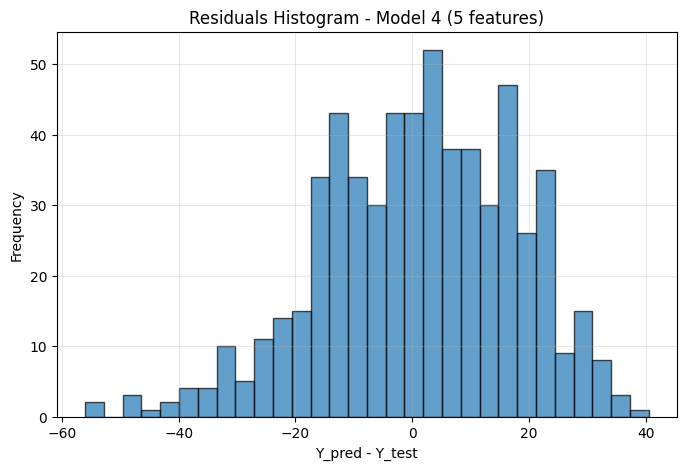

Saved m4_residuals_hist.png


In [120]:
if pred4 is not None:
    residuals = pred4 - y4_te
    fname = "m4_residuals_hist.png"
    model_name = "Model 4 (5 features)"
elif pred2 is not None:
    residuals = pred2 - y2_te
    fname = "m2_residuals_hist.png"
    model_name = "Model 2 (set1)"
elif pred3 is not None:
    residuals = pred3 - y3_te
    fname = "m3_residuals_hist.png"
    model_name = "Model 3 (set2)"
else:
    residuals = pred1 - y1_te
    fname = "m1_residuals_hist.png"
    model_name = "Model 1 (one feature)"

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Residuals Histogram - {model_name}")
plt.xlabel("Y_pred - Y_test")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(out_dir, fname), dpi=120, bbox_inches='tight')
plt.show()
print("Saved", fname)

In [121]:
# График прямой поверх точек (для m1)
plt.figure(figsize=(6,4))
plt.scatter(X1_te.values.flatten(), y1_te.values, alpha=0.6)
xs = np.linspace(X1_te.values.min(), X1_te.values.max(), 100)
k = model1.coef_[0]
b = model1.intercept_
plt.plot(xs, k*xs + b)
plt.xlabel(X1.columns[0])
plt.ylabel("APM")
plt.title("m1: scatter + line")
plt.grid(True)
plt.savefig(os.path.join(out_dir, "m1_scatter_line.png"))
plt.close()
print("Saved m1_scatter_line.png")

# Pred vs Actual (берём m2 если есть, иначе m1)
if pred2 is not None:
    plt.figure(figsize=(5,5))
    plt.scatter(y2_te, pred2, alpha=0.6)
    mn, mx = min(y2_te.min(), pred2.min()), max(y2_te.max(), pred2.max())
    plt.plot([mn,mx],[mn,mx], linestyle='--')
    plt.xlabel("Y_test"); plt.ylabel("Y_pred"); plt.title("m2: Y_pred vs Y_test")
    plt.grid(True)
    plt.savefig(os.path.join(out_dir, "m2_pred_vs_actual.png"))
    plt.close()
    print("Saved m2_pred_vs_actual.png")
else:
    plt.figure(figsize=(5,5))
    plt.scatter(y1_te, pred1, alpha=0.6)
    mn, mx = min(y1_te.min(), pred1.min()), max(y1_te.max(), pred1.max())
    plt.plot([mn,mx],[mn,mx], linestyle='--')
    plt.xlabel("Y_test"); plt.ylabel("Y_pred"); plt.title("m1: Y_pred vs Y_test")
    plt.grid(True)
    plt.savefig(os.path.join(out_dir, "m1_pred_vs_actual.png"))
    plt.close()
    print("Saved m1_pred_vs_actual.png")

# Гистограмма остатков
if pred2 is not None:
    residuals = pred2 - y2_te
    fname = "m2_residuals_hist.png"
else:
    residuals = pred1 - y1_te
    fname = "m1_residuals_hist.png"

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residuals histogram")
plt.xlabel("Y_pred - Y_test")
plt.savefig(os.path.join(out_dir, fname))
plt.close()
print("Saved", fname)

Saved m1_scatter_line.png
Saved m2_pred_vs_actual.png
Saved m2_residuals_hist.png


In [122]:
print("Initial size:", pd.read_csv("/Users/timataskin/Desktop/AI_ML/Lab1/SkillCraft.csv").shape)
print("After cleaning:", df.shape)
print("After outlier removal:", df_no_out.shape)
print("Target: APM")
print("\nFeatures used in each model:")
print("  m1 (1 feature):", x1.columns.tolist())
print("  m2 (set1):", x_set1_cols)
print("  m3 (set2):", x_set2_cols)
print("  m4 (5 features):", x_set4_cols)
print("\nModel Performance (R² / RMSE):")
print(f"  m1: R²={round(r2_1,4)} | RMSE={round(rmse_1,4)}")
if model2 is not None:
    print(f"  m2: R²={round(r2_2,4)} | RMSE={round(rmse_2,4)}")
if model3 is not None:
    print(f"  m3: R²={round(r2_3,4)} | RMSE={round(rmse_3,4)}")
if model4 is not None:
    print(f"  m4: R²={round(r2_4,4)} | RMSE={round(rmse_4,4)}")
print("\nBest model:", end=" ")
if model4 is not None and r2_4 == max([r for r in [r2_1, r2_2, r2_3, r2_4] if r is not None]):
    print("m4 (5 features)")
elif model2 is not None and r2_2 == max([r for r in [r2_1, r2_2, r2_3] if r is not None]):
    print("m2 (set1)")
elif model3 is not None and r2_3 == max([r for r in [r2_1, r2_3] if r is not None]):
    print("m3 (set2)")
else:
    print("m1 (one feature)")
print("\nFiles saved to:", out_dir)

Initial size: (3338, 20)
After cleaning: (3338, 20)
After outlier removal: (2999, 20)
Target: APM

Features used in each model:
  m1 (1 feature): ['HoursPerWeek']
  m2 (set1): ['HoursPerWeek', 'TotalHours', 'ActionLatency']
  m3 (set2): ['WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade']
  m4 (5 features): ['HoursPerWeek', 'TotalHours', 'ActionLatency', 'SelectByHotkeys', 'AssignToHotkeys']

Model Performance (R² / RMSE):
  m1: R²=0.0434 | RMSE=38.8129
  m2: R²=0.5558 | RMSE=26.4489
  m3: R²=0.1633 | RMSE=36.2981
  m4: R²=0.8239 | RMSE=16.6532

Best model: m4 (5 features)

Files saved to: /Users/timataskin/Desktop/AI_ML/Lab1/
